In [5]:
#importing libraries
import pandas as pd
import seaborn as sns
from faker import Faker
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

## Data Collection

In [6]:
#generate synthetic data
fake=Faker()

loan_types=['Personal', 'Business', 'Education', 'Auto', 'Mortgage']

product_names=['Savings Account', 'Checking Account', 'Credit Card', 'Personal Loan', 'Home Loan',
    'Auto Loan', 'Business Loan', 'Student Loan', 'Investment Fund', 'Retirement Plan',
    'Insurance Policy', 'Mutual Fund', 'Bond', 'Certificate of Deposit', 'Home Equity Line',
    'Mortgage Refinance', 'Business Credit Line', 'Auto Refinance', 'Home Improvement Loan',
    'Gold Loan', 'Cash Credit', 'Short-Term Loan', 'Long-Term Loan', 'Travel Loan',
    'Medical Loan', 'Emergency Loan', 'Holiday Loan', 'Debt Consolidation Loan', 'Small Business Loan',
    'Agricultural Loan', 'Technology Loan', 'Education Savings Plan', 'Wealth Management',
    'Stock Investment', 'Real Estate Investment', 'International Investment', 'Fixed Deposit',
    'Recurring Deposit', 'Loan Against Property', 'Gold Investment', 'Retirement Savings',
    'High-Yield Savings Account', 'Money Market Account', 'Insurance Savings', 'Pension Plan',
    'Child Education Fund', 'Healthcare Savings', 'Property Investment', 'Auto Insurance'
]
def data_col(n_records,n_customers=100,n_product=50,n_interactions=1000,csv_filename="dataset_revised1.CSV"):
    data=[]
    cus_ids=[f"C0{i+1}" for i in range(n_customers)]
    prod_ids=[f"P0{i+1}" for i in range(n_product)]

    prod_id_to_name={prod_ids[i]: product_names[i % len(product_names)] for i in range(n_product)}

    transaction_frequency = {cus_id: random.randint(1, 10) for cus_id in cus_ids}

    for i in range(n_records):
        Customer_Id=random.choice(cus_ids)
        Age=random.randint(18,70)
        Monthly_Income=round(random.uniform(20000,200000),2)
        Credit_Score=random.randint(300,850)
        Loan_Amount=round(random.uniform(100000,1000000),2)
        Interest_Rate=round(random.uniform(1.0,15.0),2)
        Loan_Term=random.choice([12,24,36,48,60])
        Loan_Type=random.choice(loan_types)
        Transaction_Id=fake.uuid4()
        Gender=np.random.choice(["Male","Female"])
        Transaction_Amount=round(random.uniform(5,2000),2)
        Transaction_Type=np.random.choice(["Deposit","Withdrawal"])
        Transaction_Date=fake.date_between("-1y","now")
        Product_Id=random.choice(prod_ids)
        Product_Name = prod_id_to_name[Product_Id]
        Interaction_Type=np.random.choice(["Purchased","Viewed","Clicked"])
        Interaction_Date=fake.date_between("-1y","now")

        #derived fields
        Debt_Income=Loan_Amount/Monthly_Income

        if Credit_Score<580:
            Credit_Score_Band="Poor"
        elif Credit_Score<670:
            Credit_Score_Band="Fair"
        elif Credit_Score<740:
            Credit_Score_Band="Good"
        else:
            Credit_Score_Band="Excellent"

        default_probability = (700 - Credit_Score) / 400 + (50000 - Monthly_Income) / 100000
        default_probability = min(max(default_probability, 0.05), 0.95)

        Repayment_Status = np.random.binomial(1, default_probability)

        Transaction_Date=pd.to_datetime(Transaction_Date)
        Interaction_Date=pd.to_datetime(Interaction_Date)

        Transaction_Year = Transaction_Date.year
        Transaction_Month = Transaction_Date.month

        Transaction_Frequency = transaction_frequency[Customer_Id]

        Interaction_Year=Interaction_Date.year
        Interaction_Day_Name=Interaction_Date.day_name()

        data.append({
            "Customer_Id": Customer_Id,
            "Age": Age,
            "Monthly_Income": Monthly_Income,
            "Credit_Score": Credit_Score,
            "Credit_Score_Band": Credit_Score_Band,
            "Loan_Amount": Loan_Amount,
            "Interest_Rate": Interest_Rate,
            "Loan_Term": Loan_Term,
            "Loan_Type": Loan_Type,
            "Debt_Income": Debt_Income,
            "Repayment_Status": Repayment_Status,
            "Transaction_Id": Transaction_Id,
            "Gender": Gender,
            "Transaction_Amount": Transaction_Amount,
            "Transaction_Type": Transaction_Type,
            "Transaction_Date": Transaction_Date,
            "Transaction_Year": Transaction_Year,
            "Transaction_Month": Transaction_Month,
            "Product_Id": Product_Id,
            "Product_Name": Product_Name,
            "Interaction_Date": Interaction_Date,
            "Interaction_Year": Interaction_Year,
            "Interaction_Day_Name": Interaction_Day_Name,
            "Interaction_Type": Interaction_Type,
            "Transaction_Frequency": Transaction_Frequency
        })

    df = pd.DataFrame(data)
    df.to_csv(csv_filename,index=False)
    print("Data successfully saved")

data_col(n_records=1000, n_customers=100, n_product=50, n_interactions=1000, csv_filename="dataset_revised1.csv")

Data successfully saved


## Data preprocessing

In [8]:
#load the data
df=pd.read_csv(r"/content/dataset_revised1.csv")
df

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Transaction_Date,Transaction_Year,Transaction_Month,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency
0,C074,59,61351.08,794,Excellent,335648.71,3.07,60,Education,5.470950,...,2024-10-11,2024,10,P018,Auto Refinance,2024-09-01,2024,Sunday,Viewed,6
1,C05,66,45775.60,356,Poor,703063.19,7.59,36,Auto,15.358907,...,2024-11-05,2024,11,P034,Stock Investment,2024-07-31,2024,Wednesday,Clicked,9
2,C093,36,48898.49,381,Poor,626421.05,10.14,24,Education,12.810642,...,2023-12-25,2023,12,P050,Savings Account,2024-07-17,2024,Wednesday,Clicked,1
3,C071,62,168632.35,690,Good,640985.88,12.22,36,Personal,3.801085,...,2024-07-15,2024,7,P015,Home Equity Line,2024-07-15,2024,Monday,Purchased,2
4,C089,48,133104.17,797,Excellent,961422.39,11.85,48,Business,7.223082,...,2024-05-16,2024,5,P029,Small Business Loan,2024-05-17,2024,Friday,Viewed,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C077,44,51688.09,527,Poor,995401.13,6.03,24,Personal,19.257843,...,2024-09-12,2024,9,P043,Money Market Account,2024-11-10,2024,Sunday,Viewed,7
996,C040,39,192456.80,336,Poor,966824.44,3.86,24,Education,5.023592,...,2024-07-22,2024,7,P014,Certificate of Deposit,2024-09-12,2024,Thursday,Viewed,8
997,C091,30,139198.90,461,Poor,351363.27,12.80,24,Auto,2.524181,...,2024-07-21,2024,7,P029,Small Business Loan,2023-12-31,2023,Sunday,Viewed,1
998,C050,39,174647.84,459,Poor,344594.28,10.34,60,Auto,1.973081,...,2023-12-25,2023,12,P06,Auto Loan,2024-07-07,2024,Sunday,Clicked,8


In [9]:
df.shape

(1000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_Id            1000 non-null   object 
 1   Age                    1000 non-null   int64  
 2   Monthly_Income         1000 non-null   float64
 3   Credit_Score           1000 non-null   int64  
 4   Credit_Score_Band      1000 non-null   object 
 5   Loan_Amount            1000 non-null   float64
 6   Interest_Rate          1000 non-null   float64
 7   Loan_Term              1000 non-null   int64  
 8   Loan_Type              1000 non-null   object 
 9   Debt_Income            1000 non-null   float64
 10  Repayment_Status       1000 non-null   int64  
 11  Transaction_Id         1000 non-null   object 
 12  Gender                 1000 non-null   object 
 13  Transaction_Amount     1000 non-null   float64
 14  Transaction_Type       1000 non-null   object 
 15  Trans

In [ ]:
df.dtypes

Customer_Id               object
Age                        int64
Monthly_Income           float64
Credit_Score               int64
Credit_Score_Band         object
Loan_Amount              float64
Interest_Rate            float64
Loan_Term                  int64
Loan_Type                 object
Debt_Income              float64
Repayment_Status           int64
Transaction_Id            object
Gender                    object
Transaction_Amount       float64
Transaction_Type          object
Transaction_Date          object
Transaction_Year           int64
Transaction_Month          int64
Product_Id                object
Product_Name              object
Interaction_Date          object
Interaction_Year           int64
Interaction_Day_Name      object
Interaction_Type          object
Transaction_Frequency      int64
dtype: object

In [ ]:
df["Transaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Interaction_Date"]=pd.to_datetime(df["Interaction_Date"])
df["Transaction_Year"]=df["Transaction_Year"].astype("category")
df["Transaction_Month"]=df["Transaction_Month"].astype("category")
df["Interaction_Year"]=df["Interaction_Year"].astype("category")
df[df.select_dtypes(include="object").columns]=df.select_dtypes(include="object").astype("category")

In [ ]:
df.dtypes

Customer_Id                    category
Age                               int64
Monthly_Income                  float64
Credit_Score                      int64
Credit_Score_Band              category
Loan_Amount                     float64
Interest_Rate                   float64
Loan_Term                         int64
Loan_Type                      category
Debt_Income                     float64
Repayment_Status                  int64
Transaction_Id                 category
Gender                         category
Transaction_Amount              float64
Transaction_Type               category
Transaction_Date         datetime64[ns]
Transaction_Year               category
Transaction_Month              category
Product_Id                     category
Product_Name                   category
Interaction_Date         datetime64[ns]
Interaction_Year               category
Interaction_Day_Name           category
Interaction_Type               category
Transaction_Frequency             int64


In [ ]:
df.isnull().sum()

Customer_Id              0
Age                      0
Monthly_Income           0
Credit_Score             0
Credit_Score_Band        0
Loan_Amount              0
Interest_Rate            0
Loan_Term                0
Loan_Type                0
Debt_Income              0
Repayment_Status         0
Transaction_Id           0
Gender                   0
Transaction_Amount       0
Transaction_Type         0
Transaction_Date         0
Transaction_Year         0
Transaction_Month        0
Product_Id               0
Product_Name             0
Interaction_Date         0
Interaction_Year         0
Interaction_Day_Name     0
Interaction_Type         0
Transaction_Frequency    0
dtype: int64

In [ ]:
df.describe()

,Age,Monthly_Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term,Debt_Income,Repayment_Status,Transaction_Amount,Transaction_Date,Interaction_Date,Transaction_Frequency
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000
mean,44.434000,109945.600550,575.015000,546171.584000,8.023380,36.768000,6.989969,0.187000,1034.411280,2024-06-15 23:34:04.799999744,2024-06-15 23:34:04.799999744,5.716000
min,18.000000,20089.720000,300.000000,100476.670000,1.000000,12.000000,0.504025,0.000000,8.160000,2023-12-11 00:00:00,2023-12-11 00:00:00,1.000000
25%,31.000000,65508.827500,441.000000,323608.520000,4.667500,24.000000,2.976552,0.000000,520.035000,2024-03-18 18:00:00,2024-03-18 18:00:00,3.000000
50%,45.000000,109771.655000,566.500000,532682.440000,7.900000,36.000000,4.986203,0.000000,1053.290000,2024-06-17 12:00:00,2024-06-17 12:00:00,6.000000
75%,58.000000,153625.825000,716.000000,763940.827500,11.432500,48.000000,8.031917,0.000000,1543.395000,2024-09-14 06:00:00,2024-09-14 06:00:00,8.250000
max,70.000000,199795.170000,850.000000,999770.950000,15.000000,60.000000,40.128663,1.000000,1998.720000,2024-12-10 00:00:00,2024-12-10 00:00:00,10.000000
std,15.468449,51523.944621,161.250893,259369.781892,3.994461,16.443861,6.612521,0.390107,580.281368,NaN,NaN,2.915106


In [ ]:
df.duplicated().sum()

0

# Exploratory Data Analysis

#### Pie chart for catergorical coulumns

<Axes: ylabel='count'>

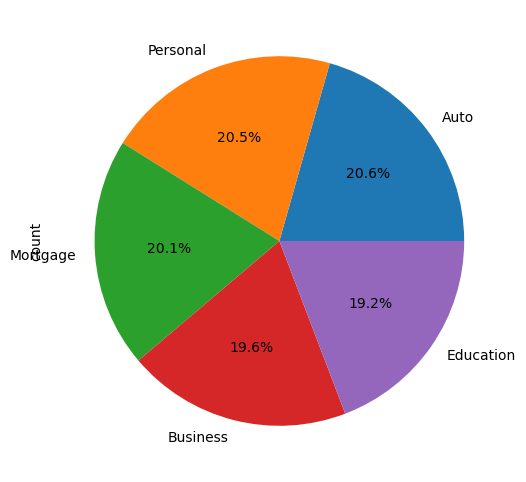

In [ ]:
#pie chart for loan type
fig = plt.figure(figsize=(6, 6))
df["Loan_Type"].value_counts().plot.pie(autopct="%1.1f%%")

<Axes: ylabel='count'>

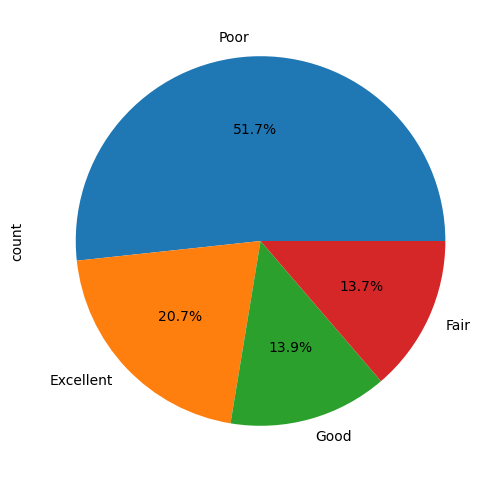

In [ ]:
#pie chart for Credit_Score_Band
fig = plt.figure(figsize=(6, 6))
df["Credit_Score_Band"].value_counts().plot.pie(autopct="%1.1f%%")

In [ ]:
#numerical columns
num_columns=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Transaction_Frequency"]

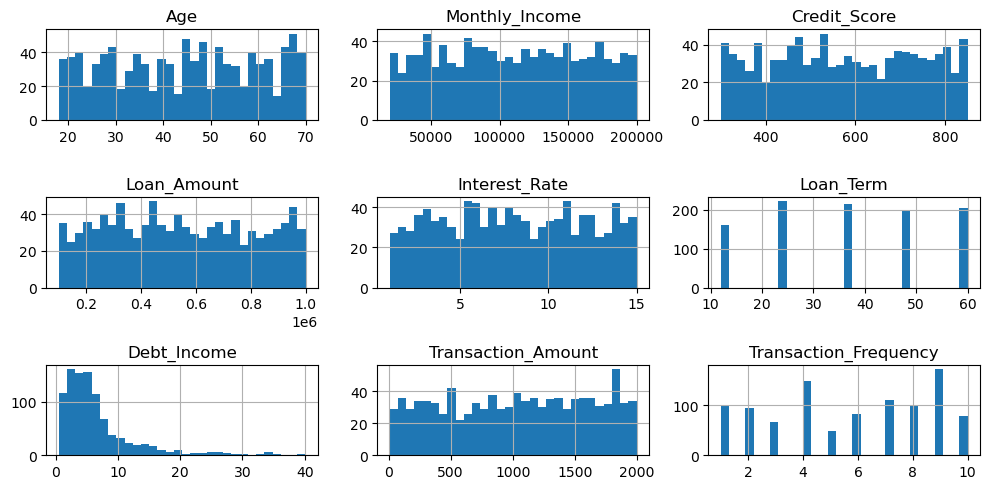

In [ ]:
#histplot-distribution of data
df[num_columns].hist(figsize=(10,5),bins=30,layout=(3,3))
plt.tight_layout()
plt.show()

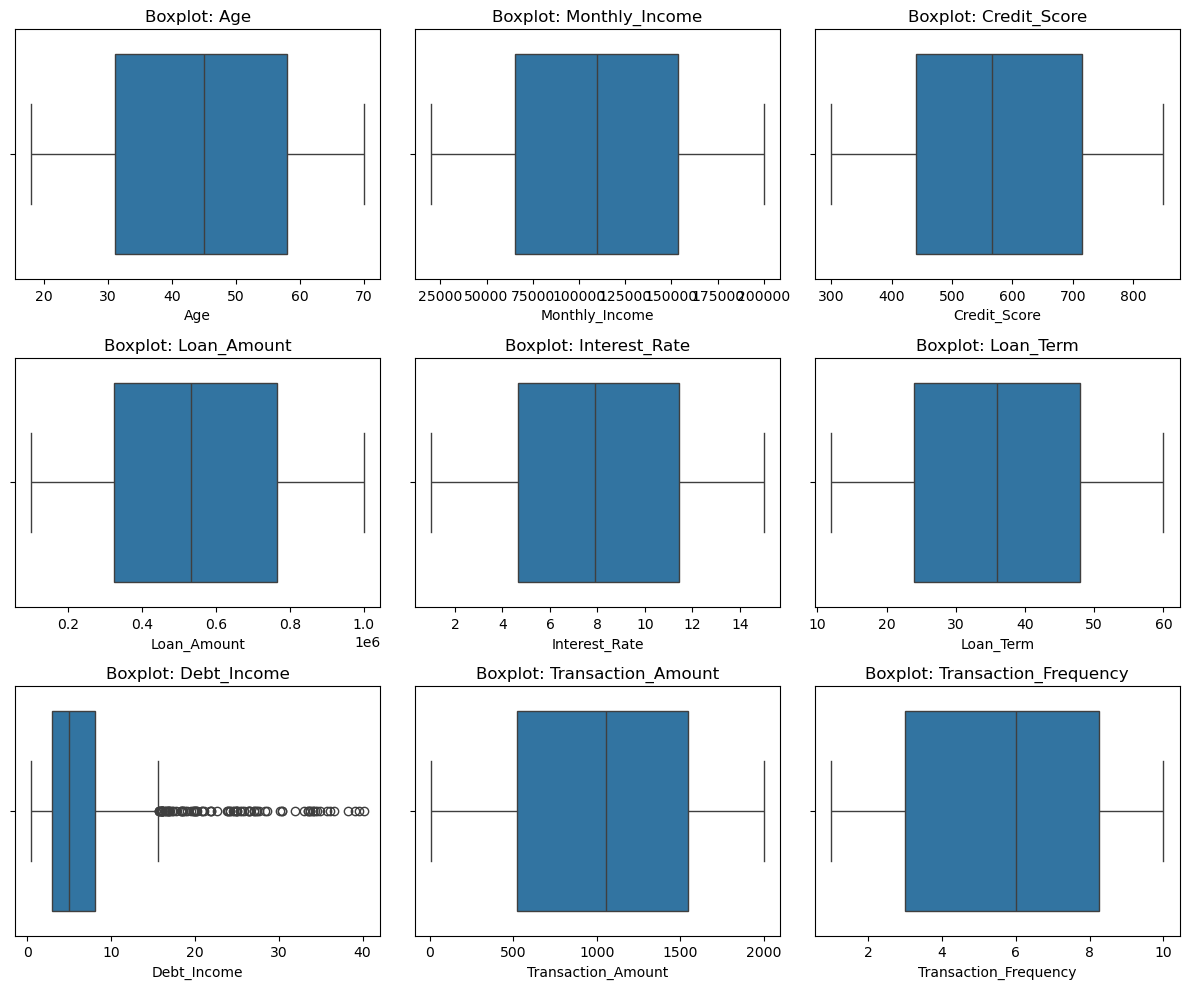

In [ ]:
#Boxplot-outlier detection
fig,axes=plt.subplots(3,3,figsize=(12,10))
axes=axes.flatten()
for ax,column in zip(axes,num_columns):
    sns.boxplot(x=df[column],ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

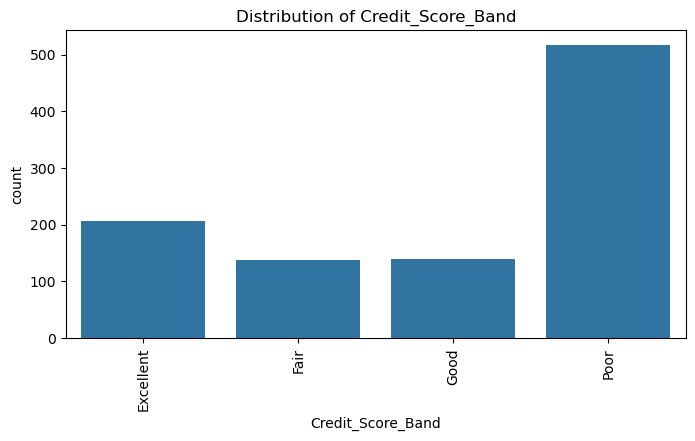

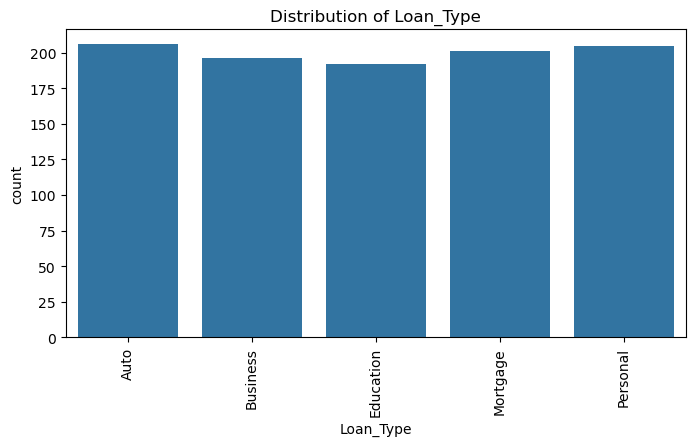

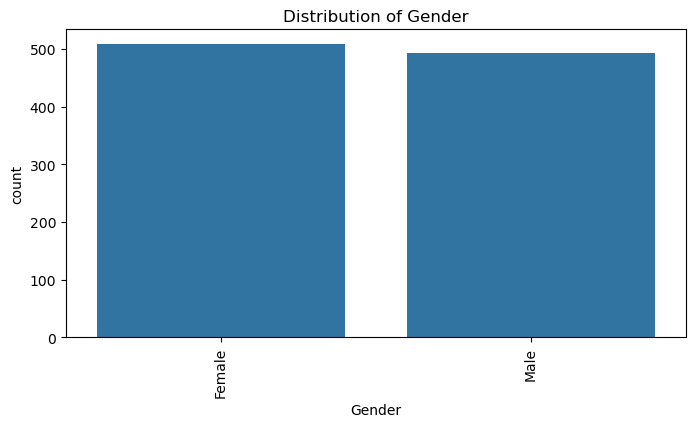

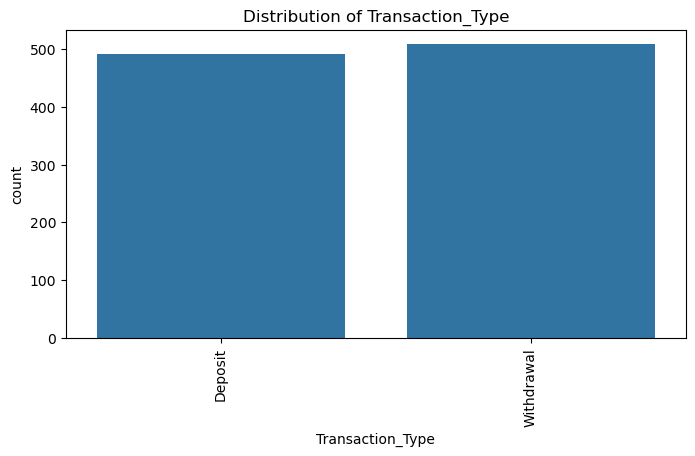

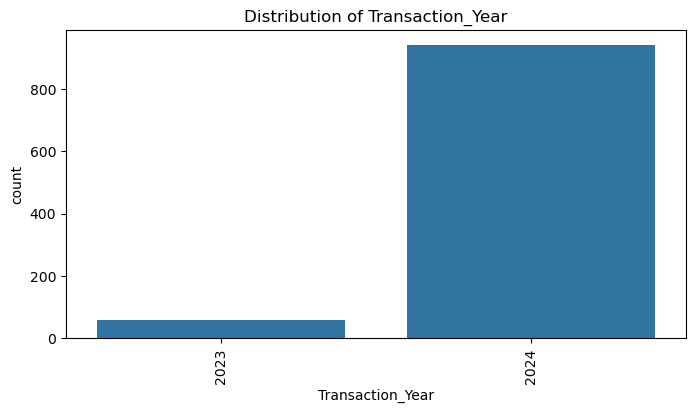

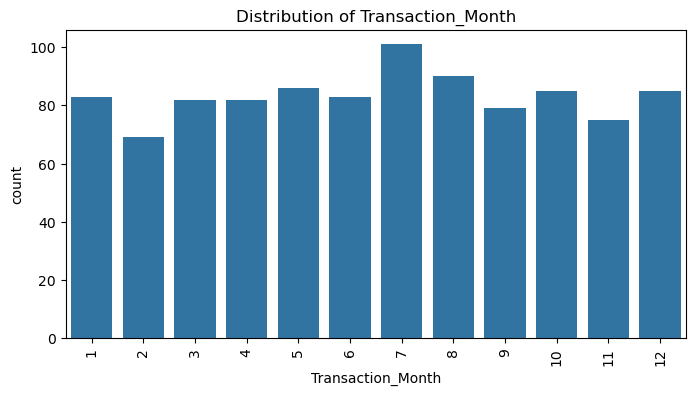

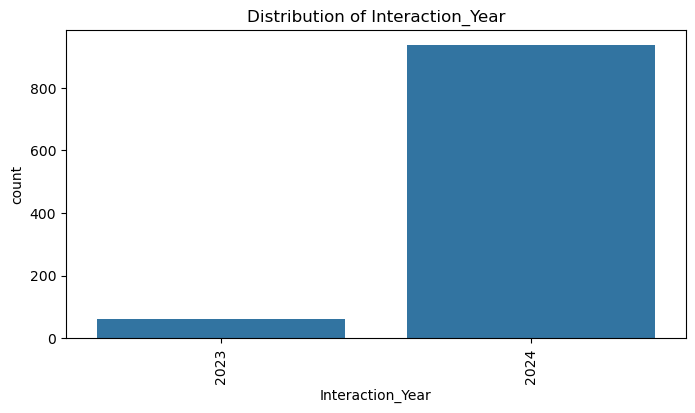

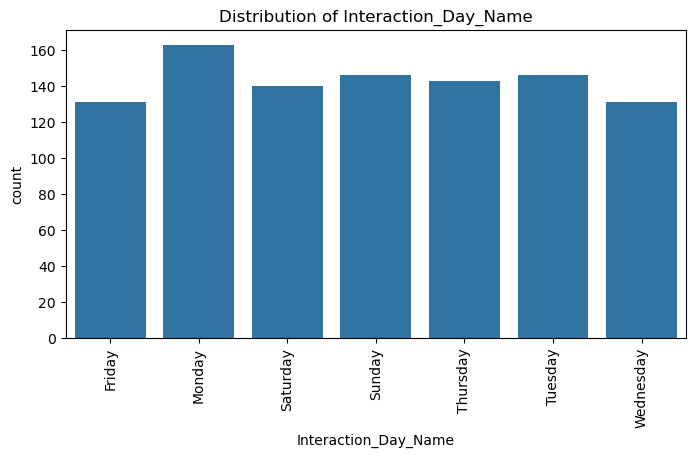

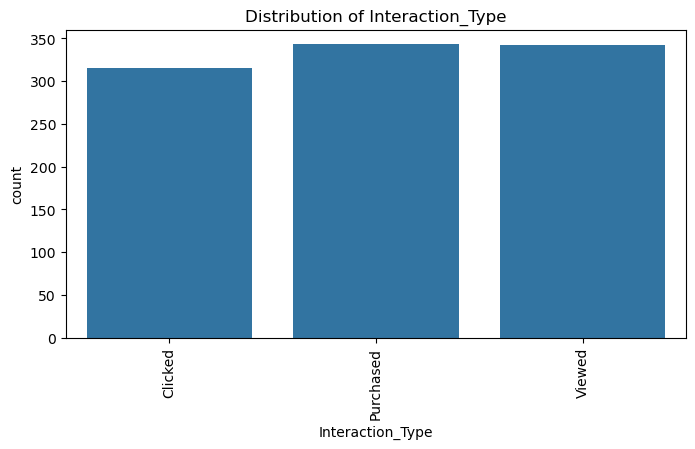

In [ ]:
# Categorical variables
cat_columns = ["Credit_Score_Band", "Loan_Type", "Gender",
               "Transaction_Type", "Transaction_Year", "Transaction_Month", "Interaction_Year", "Interaction_Day_Name", "Interaction_Type"]
for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
num_col=["Age","Monthly_Income","Credit_Score","Loan_Amount","Interest_Rate","Loan_Term","Debt_Income","Transaction_Amount","Repayment_Status","Transaction_Frequency"]

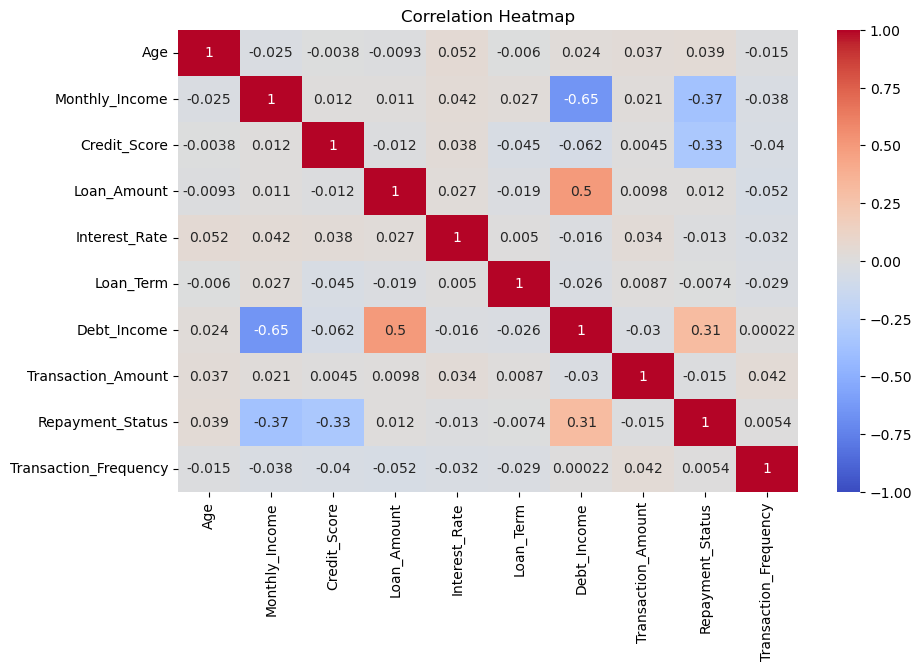

In [ ]:
#correlation matrix
co_mat=df[num_col].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(co_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

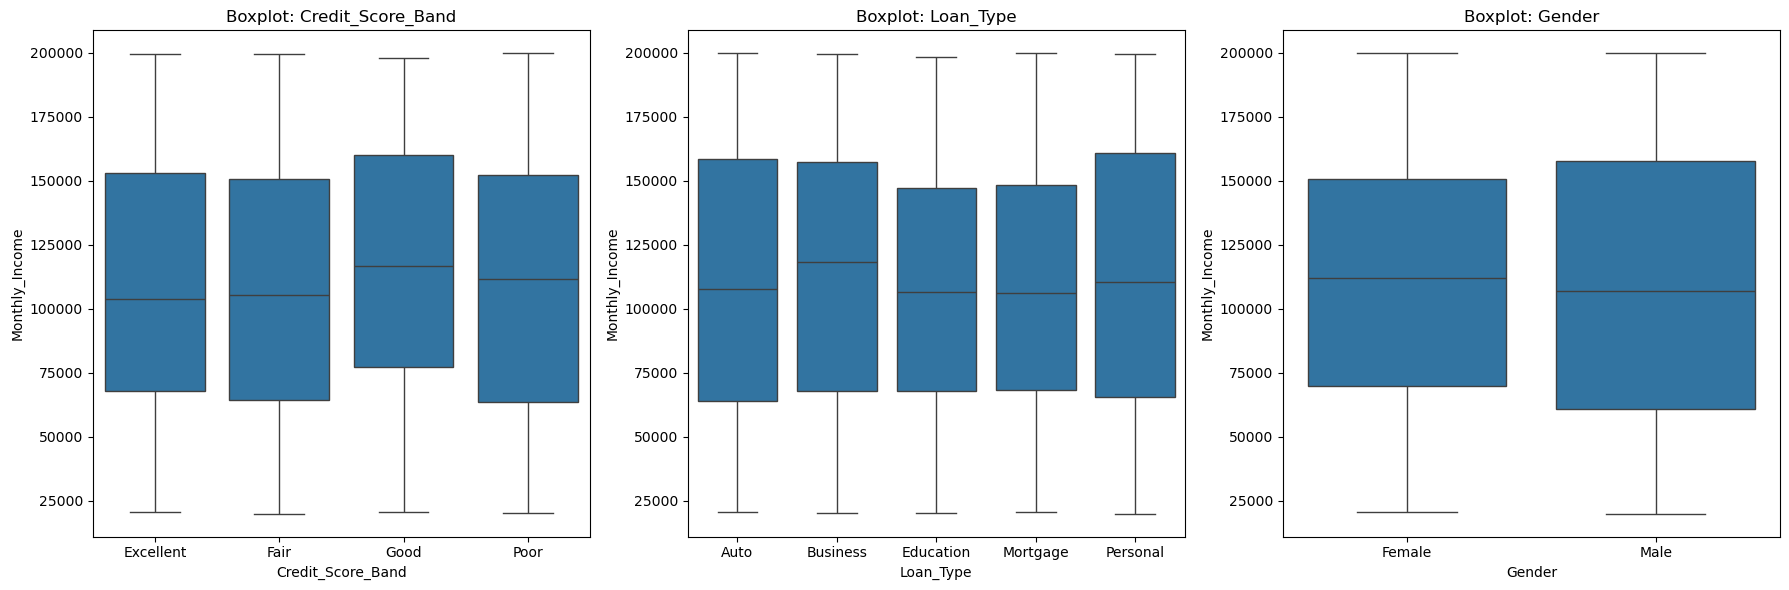

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
axes=axes.flatten()
for ax,column in zip(axes,['Credit_Score_Band', 'Loan_Type', 'Gender']):
    # sns.violinplot(x=column,y='Monthly_Income',data=df,ax=ax)
    sns.boxplot(x=column, y='Monthly_Income', data=df, ax=ax)
    ax.set_title(f"Boxplot: {column}")
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

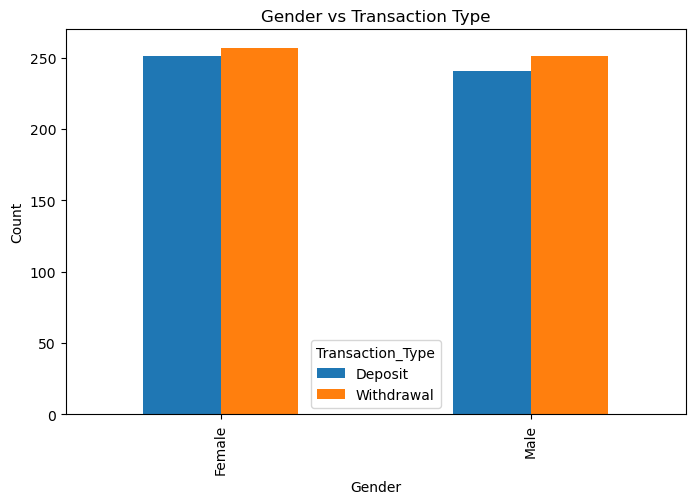

In [ ]:
# Crosstab and stacked bar chart for categorical vs categorical
pd.crosstab(df['Gender'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Gender vs Transaction Type")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

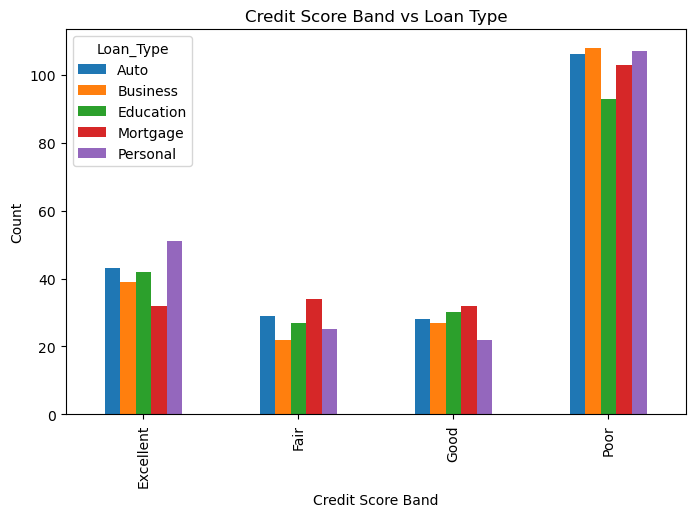

In [ ]:
# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Credit_Score_Band'], df['Loan_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Credit Score Band vs Loan Type")
plt.xlabel("Credit Score Band")
plt.ylabel("Count")
plt.show()

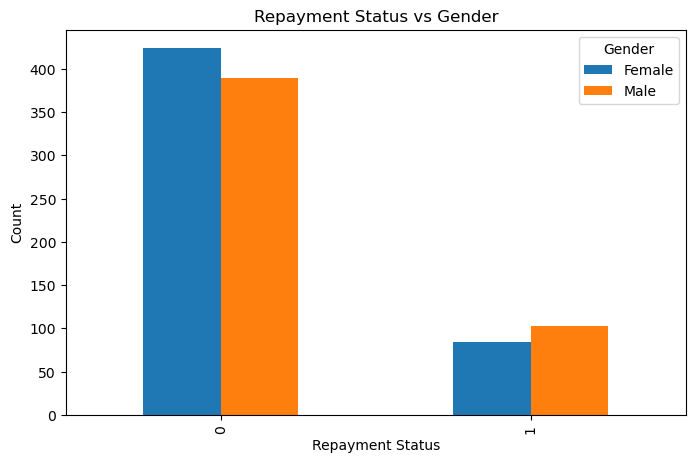

In [ ]:
# Crosstab for 'Credit_Score_Band' and 'Loan_Type'
pd.crosstab(df['Repayment_Status'], df['Gender']).plot(kind='bar', figsize=(8, 5))
plt.title("Repayment Status vs Gender")
plt.xlabel("Repayment Status")
plt.ylabel("Count")
plt.show()

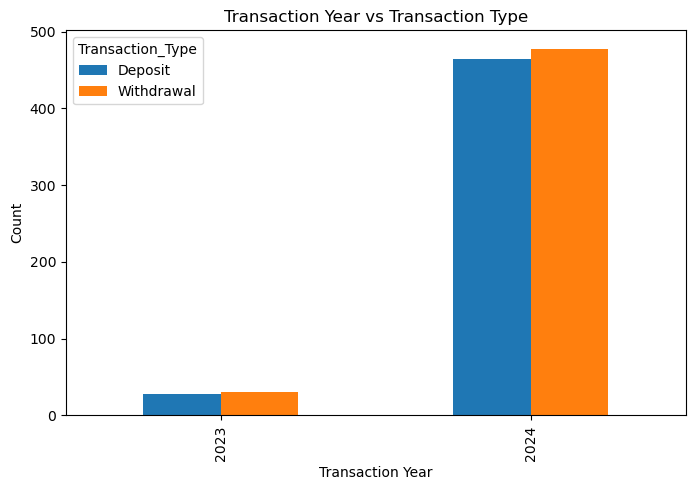

In [ ]:
pd.crosstab(df['Transaction_Year'], df['Transaction_Type']).plot(kind='bar', figsize=(8, 5))
plt.title("Transaction Year vs Transaction Type")
plt.xlabel("Transaction Year")
plt.ylabel("Count")
plt.show()

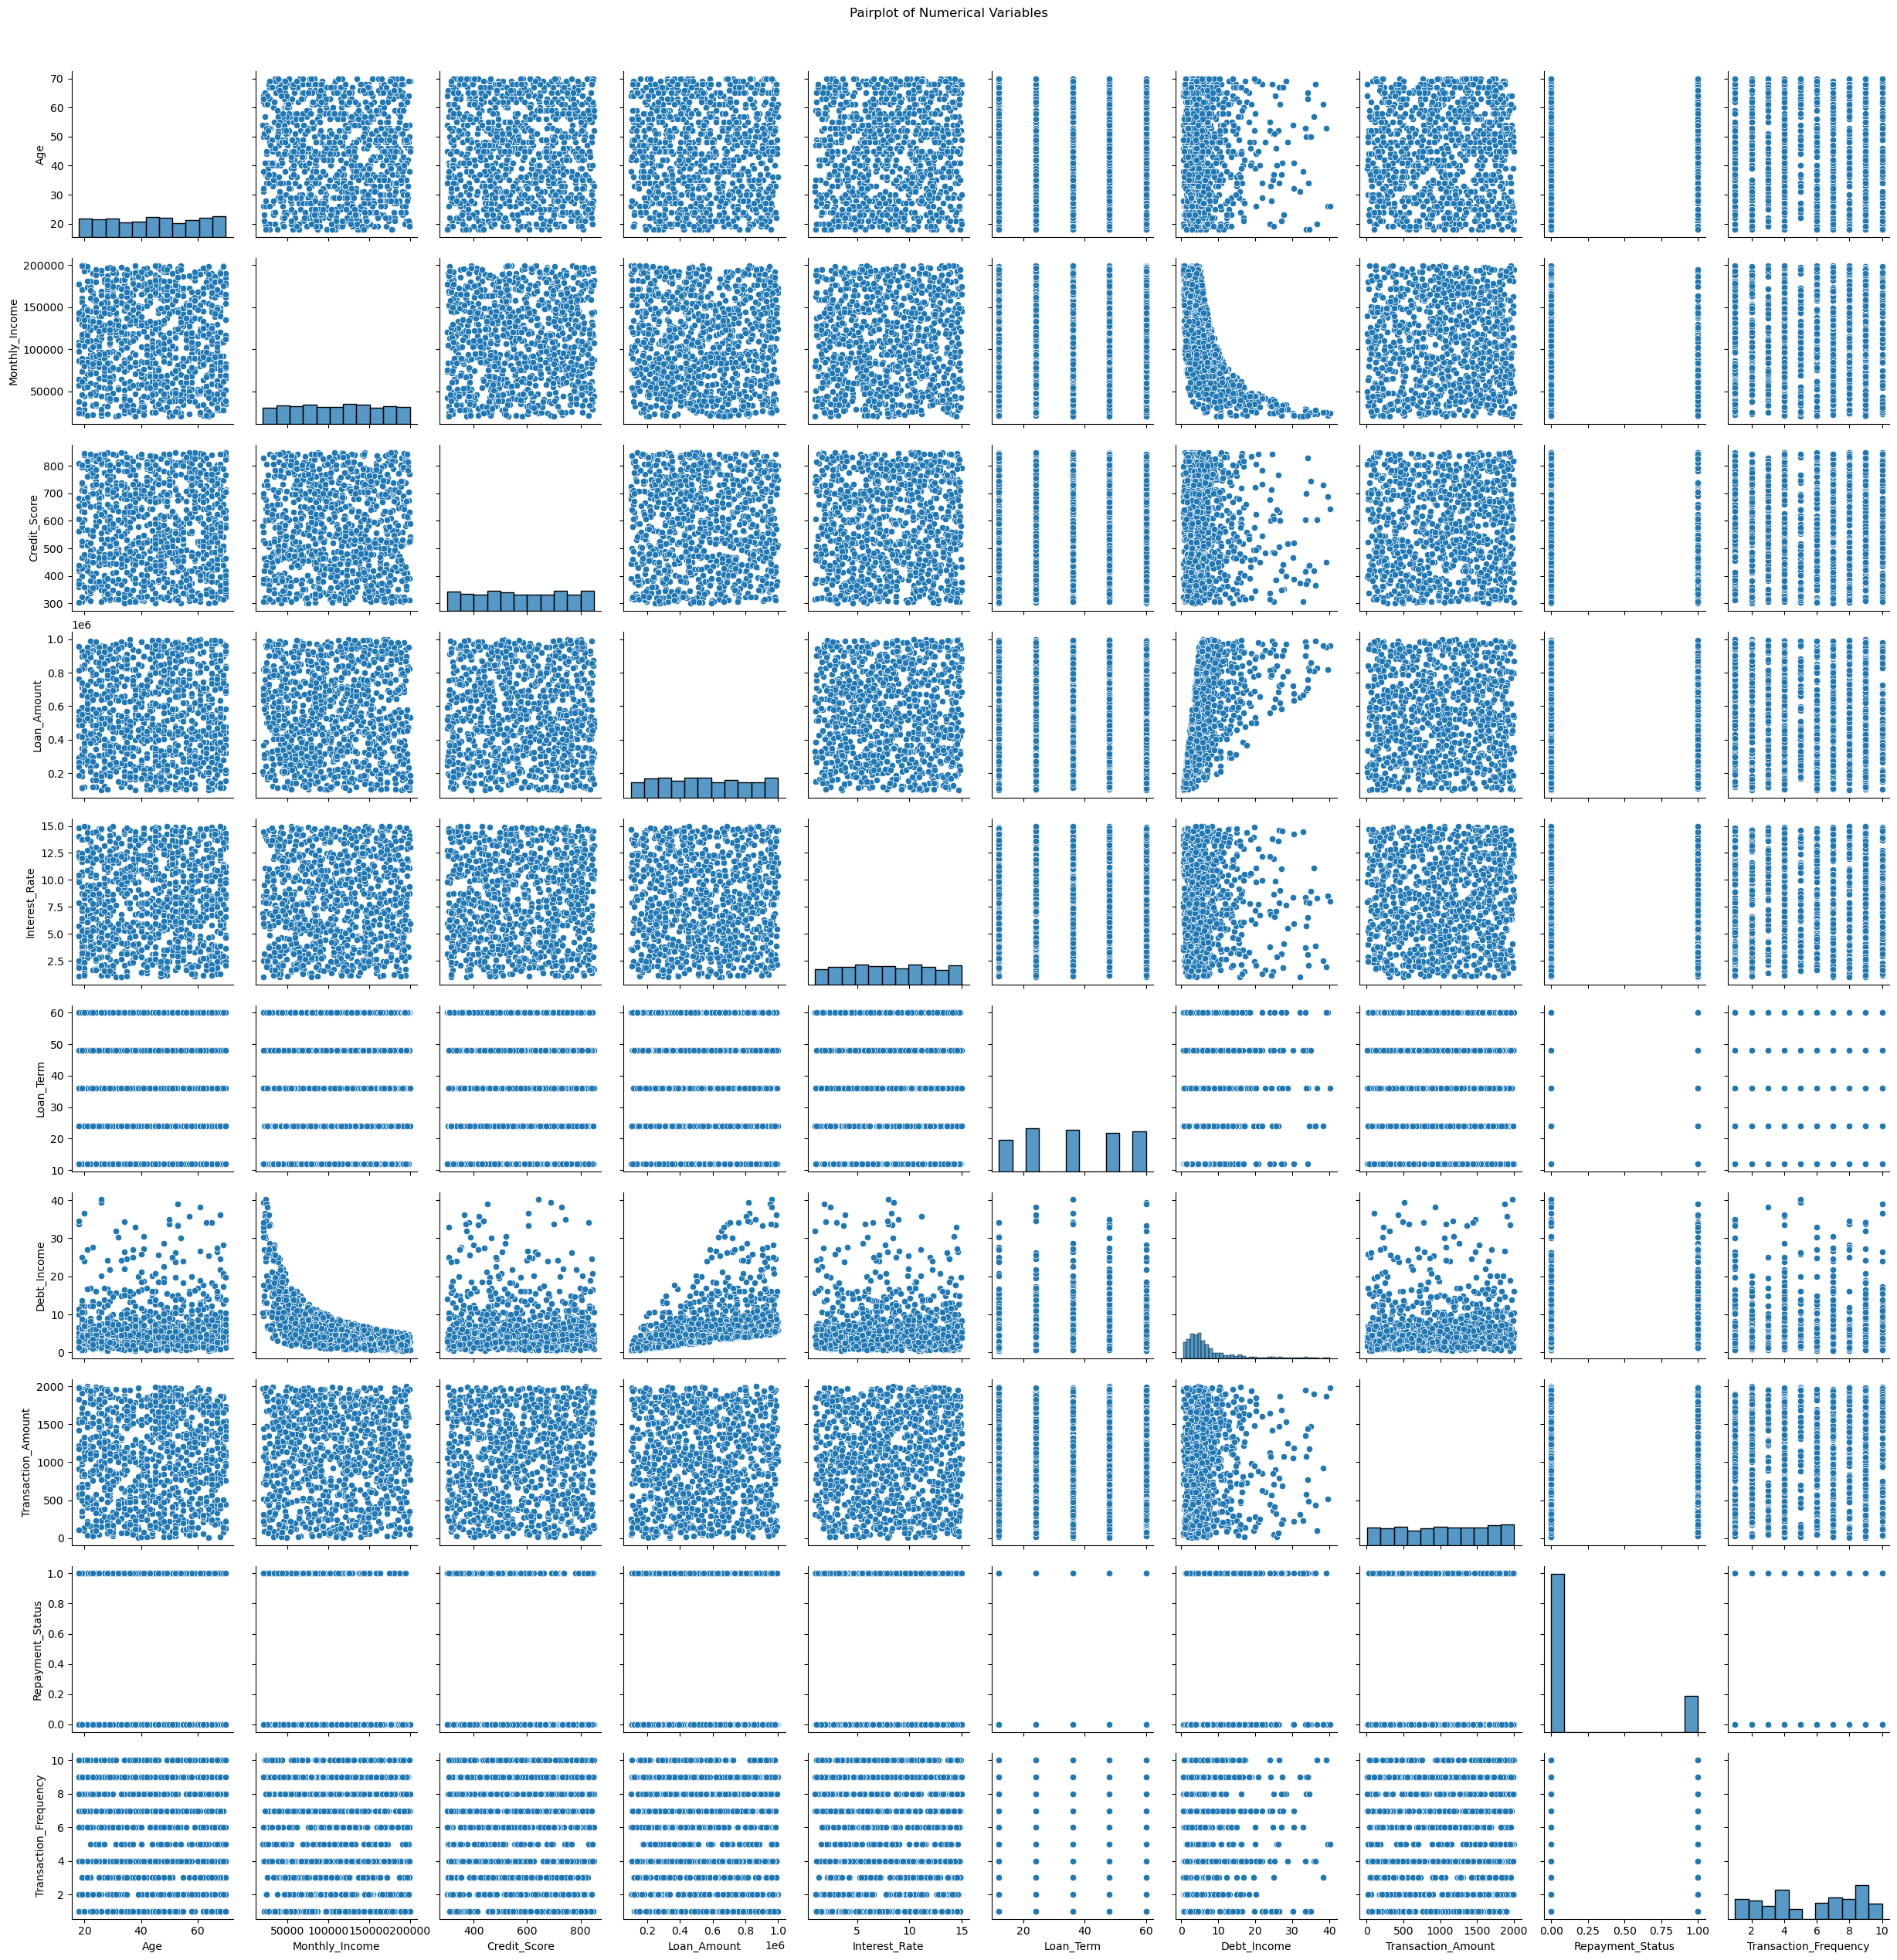

In [ ]:
sns.pairplot(df[num_col])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

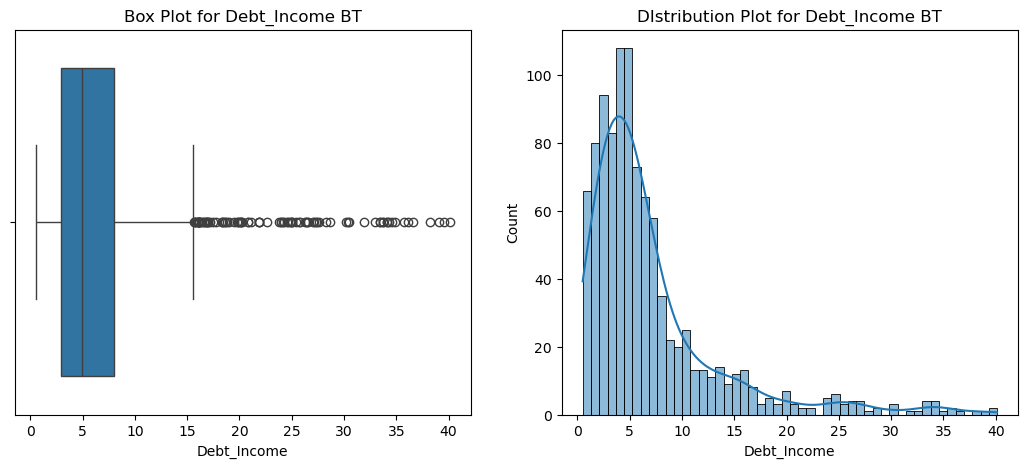

In [ ]:
col_to_check_skew=["Debt_Income"]
for i in col_to_check_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sns.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sns.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

In [ ]:
#function-to check skewness
def check_skew(df,num_columns):
    skewness_i={}
    for i in num_columns:
        skewness=df[i].skew()
        if skewness>0.5:
            skew_type="Positively Skewed"
        elif skewness<-0.5:
            skew_type="Negatively skewed"
        else:
            skew_type="Symmetric"

        skewness_i[i]={
            "skewness_value":skewness,
            "skew Type":skew_type
        }
    return pd.DataFrame(skewness_i)

In [ ]:
check_skew(df,num_columns)

,Age,Monthly_Income,Credit_Score,Loan_Amount,Interest_Rate,Loan_Term,Debt_Income,Transaction_Amount,Transaction_Frequency
skewness_value,-0.022202,0.004895,0.013115,0.071654,0.022676,-0.014982,2.341494,-0.075254,-0.155972
skew Type,Symmetric,Symmetric,Symmetric,Symmetric,Symmetric,Symmetric,Positively Skewed,Symmetric,Symmetric


In [ ]:
#skewness treatment
df["Debt_To_Income_Log"]=np.log1p(df["Debt_Income"])
df["Debt_To_Income_sqrt"]=np.sqrt(df["Debt_Income"])
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)

In [ ]:
print("log",df["Debt_To_Income_Log"].skew())
print("sqrt",df["Debt_To_Income_sqrt"].skew())
print("boxcox",df["Debt_To_Income_box_cox"].skew())

log 0.4155590640237992
sqrt 1.2136307419855783
boxcox 0.012955915262120117


In [ ]:
df["Debt_To_Income_box_cox"],_=stats.boxcox(df["Debt_Income"]+1)
print("boxcox",df["Debt_To_Income_box_cox"].skew())

boxcox 0.012955915262120117


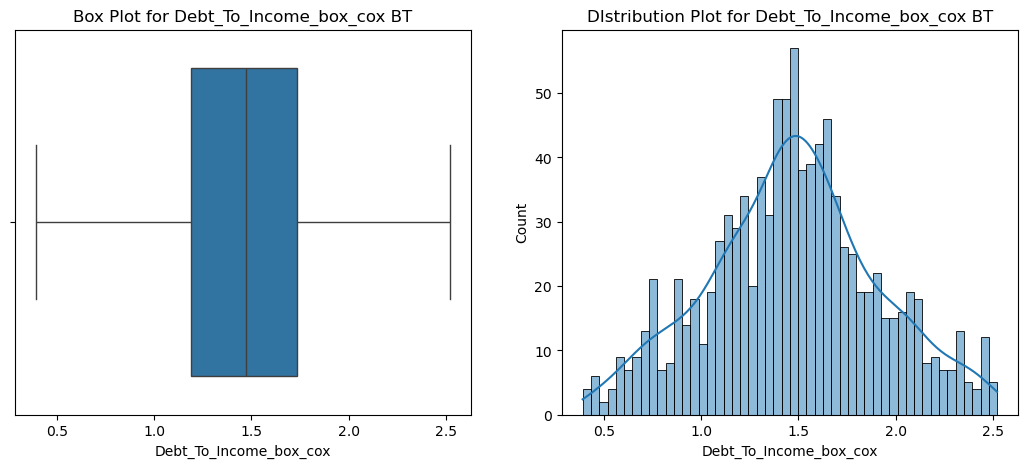

In [ ]:
#Plotting after the treatment
treated_skew=["Debt_To_Income_box_cox"]
for i in treated_skew:
        plt.figure(figsize=(20,5))

        plt.subplot(1,3,1)
        sns.boxplot(data=df,x=i)
        plt.title(f"Box Plot for {i} BT")

        plt.subplot(1,3,2)
        sns.histplot(data=df,x=i,kde=True,bins=50)
        plt.title(f"DIstribution Plot for {i} BT")

In [ ]:
df1=df.drop(columns=["Customer_Id"])

# Model Training and Evaluation

#### Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

y_pred_lr=lr_sm.predict(X_test)

y_pred_lr_proba = lr_sm.predict_proba(X_test)[:, 1]

roc_auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

accuracy_lr=accuracy_score(y_test, y_pred_lr)
precision_scr_lr=precision_score(y_test, y_pred_lr)
recall_scr_lr=recall_score(y_test, y_pred_lr)
f1_scr_lr=f1_score(y_test, y_pred_lr)
roc_auc_lr=roc_auc_lr
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1-Score:", f1_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)

Logistic Regression Accuracy: 0.7566666666666667
Logistic Regression Precision: 0.3645833333333333
Logistic Regression Recall: 0.7446808510638298
Logistic Regression F1-Score: 0.48951048951048953
Logistic Regression ROC-AUC Score: 0.8216298040534857


In [ ]:
#checking for imbalanced data
y_smote.value_counts()

Repayment_Status
0    560
1    560
Name: count, dtype: int64

In [ ]:
#Hyperparameter Tuning for Logistion Regression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.preprocessing import StandardScaler,LabelEncoder

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

lr_sm=LogisticRegression(random_state=42)
lr_sm.fit(x_smote,y_smote)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [100, 200, 300]
}

scoring = make_scorer(f1_score)
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    scoring=scoring,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_smote, y_smote)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_proba=best_model.predict_proba(X_test)[:,1]

accuracy_lr_at=accuracy_score(y_test, y_pred_best)
precision_scr_lr_at=precision_score(y_test, y_pred_best)
recall_scr_lr_at=recall_score(y_test, y_pred_best)
f1_score_lr_at=f1_score(y_test, y_pred_best)
roc_auc_lr_at=roc_auc_score(y_test, y_pred_best_proba)
print("Best Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Logistic Regression Precision:", precision_score(y_test, y_pred_best))
print("Best Logistic Regression Recall:", recall_score(y_test, y_pred_best))
print("Best Logistic Regression F1-Score:", f1_score(y_test, y_pred_best))
print("Best Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_proba))

Best Parameters: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.7964201459847378
Best Logistic Regression Accuracy: 0.76
Best Logistic Regression Precision: 0.3684210526315789
Best Logistic Regression Recall: 0.7446808510638298
Best Logistic Regression F1-Score: 0.49295774647887325
Best Logistic Regression ROC-AUC Score: 0.8192750819947858


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [ ]:
df1.sample(2)

,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,Repayment_Status,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
896,68,120581.85,579,Poor,112436.63,5.09,48,Mortgage,0.932451,0,...,P027,Holiday Loan,2024-11-10,2024,Sunday,Purchased,2,0.658789,0.965635,0.612418
444,29,119413.70,807,Excellent,183362.52,12.68,36,Business,1.535523,0,...,P01,Savings Account,2024-05-28,2024,Tuesday,Clicked,3,0.930400,1.239162,0.839716


## Decision Tree Classifier

In [ ]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])
X = X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

y_pred_dt=dt_sm.predict(X_test)

y_pred_dt_proba= dt_sm.predict_proba(X_test)[:, 1]

roc_auc_dt = roc_auc_score(y_test, y_pred_dt_proba)


accuracy_dt=accuracy_score(y_test, y_pred_dt)
precision_scr_dt=precision_score(y_test, y_pred_dt)
recall_scr_dt=recall_score(y_test, y_pred_dt)
f1_scr_dt=f1_score(y_test, y_pred_dt)
roc_auc_dt=roc_auc_dt
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Precision:", precision_score(y_test, y_pred_dt))
print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))
print("Decision Tree F1-Score:", f1_score(y_test, y_pred_dt))
print("Decision Tree Classifier ROC-AUC Score:", roc_auc_dt)

Decision Tree Accuracy: 0.8233333333333334
Decision Tree Precision: 0.453125
Decision Tree Recall: 0.6170212765957447
Decision Tree F1-Score: 0.5225225225225225
Decision Tree Classifier ROC-AUC Score: 0.7393406778235642


In [ ]:
#Hyperparameter Tuning for Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

dt_sm=DecisionTreeClassifier(random_state=42)
dt_sm.fit(x_smote,y_smote)

param_grid_dt={
    "max_depth":[5, 10, 15, 20, 25],
    "min_samples_split":[2, 5, 10, 20],
    "min_samples_leaf":[1, 2, 5, 10],
    "criterion":["gini","entropy"]
}

scoring=make_scorer(f1_score)

grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid_dt,
                            scoring=scoring,
                            cv=5)

grid_search_dt.fit(x_smote,y_smote)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best F1-Score:", grid_search_dt.best_score_)

best_dt_model=grid_search_dt.best_estimator_

y_pred_best_dt=best_dt_model.predict(X_test)
y_pred_best_dt_proba = best_dt_model.predict_proba(X_test)[:, 1]

accuracy_dt_at=accuracy_score(y_test, y_pred_best_dt)
precision_scr_dt_at=precision_score(y_test, y_pred_best_dt)
recall_scr_dt_at=recall_score(y_test, y_pred_best_dt)
f1_score_dt_at=f1_score(y_test, y_pred_best_dt)
roc_auc_dt_at=roc_auc_score(y_test, y_pred_best_dt_proba)
print("Best Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Best Decision Tree Precision:", precision_score(y_test, y_pred_best_dt))
print("Best Decision Tree Recall:", recall_score(y_test, y_pred_best_dt))
print("Best Decision Tree F1-Score:", f1_score(y_test, y_pred_best_dt))
print("Best Decision Tree ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_dt_proba))

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-Score: 0.8513691647970285
Best Decision Tree Accuracy: 0.7766666666666666
Best Decision Tree Precision: 0.35294117647058826
Best Decision Tree Recall: 0.5106382978723404
Best Decision Tree F1-Score: 0.41739130434782606
Best Decision Tree ROC-AUC Score: 0.6771507863089732


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[64],
    "Monthly_Income":[78007.72],
    "Credit_Score":[515],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[605969.14],
    "Interest_Rate":[11.80],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[7.768066]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 1


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[25],
    "Monthly_Income":[32017.29],
    "Credit_Score":[647],
    "Credit_Score_Band":["Fair"],
    "Loan_Amount":[313237.82],
    "Interest_Rate":[10.65],
    "Loan_Term":[36],
    "Loan_Type":["Auto"],
    "Debt_Income":[9.783396]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = lr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])


Predicted Repayment Status: 1


## Random Forest Classifier

In [ ]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

y_pred_rfr=rfr_sm.predict(X_test)

y_pred_rfr_proba = rfr_sm.predict_proba(X_test)[:, 1]

accuracy_rf=accuracy_score(y_test, y_pred_rfr)
precision_scr_rf=precision_score(y_test, y_pred_rfr)
recall_scr_rf=recall_score(y_test, y_pred_rfr)
f1_scr_rf=f1_score(y_test, y_pred_rfr)
roc_auc_rf=roc_auc_score(y_test, y_pred_rfr_proba)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rfr))
print("Random Forest Precision:", precision_score(y_test, y_pred_rfr))
print("Random Forest Recall:", recall_score(y_test, y_pred_rfr))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rfr))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_pred_rfr_proba))

Random Forest Accuracy: 0.87
Random Forest Precision: 0.5714285714285714
Random Forest Recall: 0.6808510638297872
Random Forest F1-Score: 0.6213592233009708
Random Forest ROC-AUC: 0.8600622319401229


In [ ]:
df1.sample(2)

,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,Repayment_Status,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
527,44,102082.70,435,Poor,600219.07,9.97,36,Mortgage,5.879733,0,...,P017,Business Credit Line,2024-11-18,2024,Monday,Clicked,10,1.928580,2.424816,1.565550
494,45,55271.26,541,Poor,140789.45,11.91,60,Auto,2.547245,0,...,P05,Home Loan,2023-12-19,2023,Tuesday,Viewed,4,1.266171,1.596009,1.102221


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[39],
    "Monthly_Income":[66693.45],
    "Credit_Score":[516],
    "Credit_Score_Band":["Poor"],
    "Loan_Amount":[457037.09],
    "Interest_Rate":[3.39],
    "Loan_Term":[12],
    "Loan_Type":["Auto"],
    "Debt_Income":[6.852803]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [ ]:
#Hyperparameter Tuning For Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])
X["Debt_Income_log"] = np.log1p(X["Debt_Income"].replace(0, 0.1))
X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

rfr_sm=RandomForestClassifier(random_state=42)
rfr_sm.fit(x_smote,y_smote)

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2],
    "criterion": ["gini"]
}

scoring=make_scorer(f1_score)

grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid_rf,
                            scoring=scoring,
                            cv=5)

grid_search_rf.fit(x_smote,y_smote)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score:", grid_search_rf.best_score_)

best_rf_model=grid_search_rf.best_estimator_

y_pred_best_rf=best_rf_model.predict(X_test)
y_pred_best_rf_proba = best_rf_model.predict_proba(X_test)[:, 1]

accuracy_rf_at=accuracy_score(y_test, y_pred_best_rf)
precision_scr_rf_at=precision_score(y_test, y_pred_best_rf)
recall_scr_rf_at=recall_score(y_test, y_pred_best_rf)
f1_score_rf_at=f1_score(y_test, y_pred_best_rf)
roc_auc_rf_at=roc_auc_score(y_test, y_pred_best_rf_proba)
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Random Forest Precision:", precision_score(y_test, y_pred_best_rf))
print("Best Random Forest Recall:", recall_score(y_test, y_pred_best_rf))
print("Best Random Forest F1-Score:", f1_score(y_test, y_pred_best_rf))
print("Best Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_rf_proba))
print("Data Preprocessing Complete")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("Grid Search Completed")
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best F1-Score: 0.8979230574411199
Best Random Forest Accuracy: 0.8666666666666667
Best Random Forest Precision: 0.5614035087719298
Best Random Forest Recall: 0.6808510638297872
Best Random Forest F1-Score: 0.6153846153846154
Best Random Forest ROC-AUC Score: 0.8450088302077201
Data Preprocessing Complete
Train Shape: (700, 9)
Test Shape: (300, 9)
Grid Search Completed
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## Gradient Boosting Classifier

In [ ]:
#Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

le_credict=LabelEncoder()
X["Credit_Score_Band"] = le_credict.fit_transform(X["Credit_Score_Band"])

le_loan=LabelEncoder()
X["Loan_Type"] = le_loan.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

y_pred_gb=gb_sm.predict(X_test)

y_pred_prob_gbb = gb_sm.predict_proba(X_test)[:, 1]

accuracy_gb=accuracy_score(y_test, y_pred_gb)
precision_scr_gb=precision_score(y_test, y_pred_gb)
recall_scr_gb=recall_score(y_test, y_pred_gb)
f1_scr_gb=f1_score(y_test, y_pred_gb)
roc_auc_gb=roc_auc_score(y_test, y_pred_prob_gbb)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Precision:", precision_score(y_test, y_pred_gb))
print("Gradient Boosting Recall:", recall_score(y_test, y_pred_gb))
print("Gradient Boosting F1-Score:", f1_score(y_test, y_pred_gb))
print("Gradient Boosting ROC-AUC:", roc_auc_score(y_test, y_pred_prob_gbb))

Gradient Boosting Accuracy: 0.8566666666666667
Gradient Boosting Precision: 0.5333333333333333
Gradient Boosting Recall: 0.6808510638297872
Gradient Boosting F1-Score: 0.5981308411214953
Gradient Boosting ROC-AUC: 0.8391220250609707


In [ ]:
#Hyperparameter Tuning for Gradient Boosting Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
X=df[["Age","Monthly_Income","Credit_Score","Credit_Score_Band","Loan_Amount","Interest_Rate","Loan_Term","Loan_Type","Debt_Income"]]
y=df["Repayment_Status"]

#encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X["Credit_Score_Band"] = le.fit_transform(X["Credit_Score_Band"])
X["Loan_Type"] = le.fit_transform(X["Loan_Type"])

X["Debt_Income_log"]=np.log1p(X["Debt_Income"])

X=X.drop(columns=["Debt_Income"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

gb_sm=GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_smote,y_smote)

param_grid_gb={
    "max_depth":[2,3,4],
    "learning_rate":[0.05,0.1],
    "n_estimators":[100,200],
    "subsample": [0.8, 1.0],
    "min_samples_split": [2, 5]
}

scoring=make_scorer(f1_score)

grid_search_gb=GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                            param_grid=param_grid_gb,
                            scoring=scoring,
                            cv=5)

grid_search_gb.fit(x_smote,y_smote)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best F1-Score:", grid_search_gb.best_score_)

best_gb_model=grid_search_gb.best_estimator_

y_pred_best_gb=best_gb_model.predict(X_test)
y_pred_best_gb_proba = best_gb_model.predict_proba(X_test)[:, 1]

accuracy_gb_at=accuracy_score(y_test, y_pred_best_gb)
precision_scr_gb_at=precision_score(y_test, y_pred_best_gb)
recall_scr_gb_at=recall_score(y_test, y_pred_best_gb)
f1_score_gb_at=f1_score(y_test, y_pred_best_gb)
roc_auc_gb_at=roc_auc_score(y_test, y_pred_best_gb_proba)
print("Best Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Precision:", precision_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting Recall:", recall_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting F1-Score:", f1_score(y_test, y_pred_best_gb))
print("Best Gradient Boosting ROC-AUC Score:", roc_auc_score(y_test, y_pred_best_gb_proba))
print("Data Preprocessing Complete")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("Grid Search Completed")
print("Best Parameters:", grid_search_rf.best_params_)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score: 0.9027806410420102
Best Gradient Boosting Accuracy: 0.8433333333333334
Best Gradient Boosting Precision: 0.5
Best Gradient Boosting Recall: 0.5957446808510638
Best Gradient Boosting F1-Score: 0.5436893203883495
Best Gradient Boosting ROC-AUC Score: 0.8106130687074259
Data Preprocessing Complete
Train Shape: (700, 9)
Test Shape: (300, 9)
Grid Search Completed
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


In [ ]:
#checking the prediction for repayment status
input_data=pd.DataFrame({
    "Age":[53],
    "Monthly_Income":[128625.23],
    "Credit_Score":[810],
    "Credit_Score_Band":["Excellent"],
    "Loan_Amount":[679786.33],
    "Interest_Rate":[11.20],
    "Loan_Term":[36],
    "Loan_Type":["Mortgage"],
    "Debt_Income":[5.285015]
})

input_data["Credit_Score_Band"] = le_credict.transform(input_data["Credit_Score_Band"])
input_data["Loan_Type"] = le_loan.transform(input_data["Loan_Type"])
input_data["Debt_Income_log"]=np.log1p(input_data["Debt_Income"])

X_sample = input_data[[
    "Age", "Monthly_Income", "Credit_Score",
    "Credit_Score_Band", "Loan_Amount",
    "Interest_Rate", "Loan_Term", "Loan_Type",
    "Debt_Income_log"
]]

X_sample_Scaled=scaler.transform(X_sample)
prediction = rfr_sm.predict(X_sample_Scaled)
print("Predicted Repayment Status:", prediction[0])

Predicted Repayment Status: 0


## Model Accuracy comparison: Before and After Tuning

In [ ]:
models=pd.DataFrame({
    "Model":["Logistic Regression","Decision TreeClassifier","Random Forest Classifier","Gradient Boosting Classifier"],

    "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_gb],

    "Accuracy after Tuning":[accuracy_lr_at,accuracy_dt_at,accuracy_rf_at,accuracy_gb_at]
})
models

,Model,Accuracy,Accuracy after Tuning
0,Logistic Regression,0.756667,0.760000
1,Decision TreeClassifier,0.823333,0.776667
2,Random Forest Classifier,0.870000,0.866667
3,Gradient Boosting Classifier,0.856667,0.843333


In [ ]:
#saving the Random Forest Classifier model using pickle, as it shows the highest accuracy
import pickle

with open("rf_cl.pkl","wb") as f:
    pickle.dump(rfr_sm,f)

with open("l_e_credict.pkl","wb") as f:
    pickle.dump(le_credict,f)

with open("l_e_loan.pkl","wb") as f:
    pickle.dump(le_loan,f)

with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

## Unsupervised learning

In [ ]:
df

,Customer_Id,Age,Monthly_Income,Credit_Score,Credit_Score_Band,Loan_Amount,Interest_Rate,Loan_Term,Loan_Type,Debt_Income,...,Product_Id,Product_Name,Interaction_Date,Interaction_Year,Interaction_Day_Name,Interaction_Type,Transaction_Frequency,Debt_To_Income_Log,Debt_To_Income_sqrt,Debt_To_Income_box_cox
0,C069,37,164694.21,463,Poor,200268.37,5.06,48,Personal,1.216001,...,P046,Child Education Fund,2024-09-08,2024,Sunday,Purchased,4,0.795704,1.102724,0.728727
1,C073,70,78253.98,714,Good,725388.57,8.28,12,Mortgage,9.269670,...,P023,Long-Term Loan,2024-06-25,2024,Tuesday,Clicked,9,2.329195,3.044613,1.814122
2,C02,52,41895.86,461,Poor,829183.89,14.93,48,Business,19.791547,...,P033,Wealth Management,2024-02-29,2024,Thursday,Purchased,7,3.034547,4.448769,2.200985
3,C049,54,23871.75,467,Poor,719495.26,8.39,48,Auto,30.140030,...,P014,Certificate of Deposit,2024-05-23,2024,Thursday,Purchased,1,3.438494,5.489994,2.396479
4,C030,70,112095.28,836,Excellent,694620.82,3.65,36,Personal,6.196700,...,P029,Small Business Loan,2024-01-09,2024,Tuesday,Clicked,1,1.973623,2.489317,1.594626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C042,42,94134.21,523,Poor,393867.36,7.81,24,Education,4.184104,...,P010,Retirement Plan,2024-02-28,2024,Wednesday,Purchased,7,1.645597,2.045508,1.376005
996,C057,62,116317.22,508,Poor,708359.43,1.14,24,Mortgage,6.089893,...,P045,Pension Plan,2024-07-15,2024,Monday,Purchased,9,1.958670,2.467771,1.585006
997,C065,38,84599.69,669,Fair,591934.45,4.81,48,Education,6.996887,...,P039,Loan Against Property,2023-12-29,2023,Friday,Viewed,10,2.079052,2.645163,1.661544
998,C065,57,152296.97,366,Poor,582870.42,4.99,36,Mortgage,3.827196,...,P042,High-Yield Savings Account,2024-12-09,2024,Monday,Purchased,10,1.574266,1.956322,1.326297


Silhouette Score for kmeans: 0.4120078908311366
Davies-Bouldin Index for kmeans: 0.8133783790648051


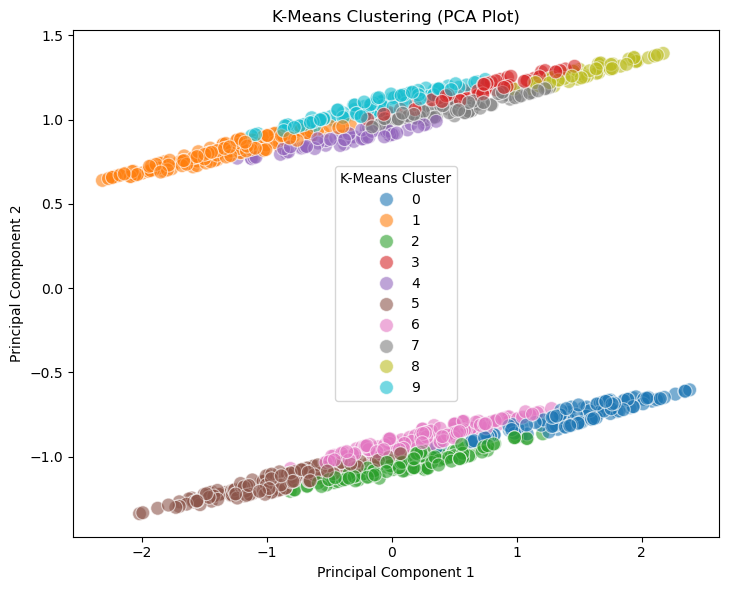

<Axes: xlabel='KMeans_Cluster', ylabel='count'>

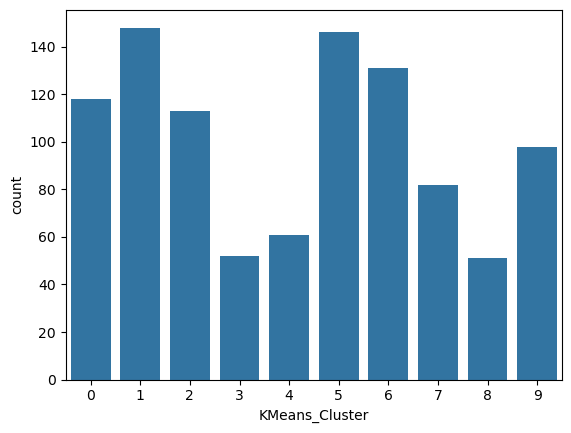

In [ ]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pickle

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_kmean = StandardScaler()
f_s = scaler_kmean.fit_transform(feature)

kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
k_means_clusters = kmeans.fit_predict(f_s)
df['KMeans_Cluster'] = k_means_clusters

silhouette_avg_kmeans = silhouette_score(f_s, k_means_clusters)
dbi_kmeans = davies_bouldin_score(f_s, k_means_clusters)

print(f'Silhouette Score for kmeans: {silhouette_avg_kmeans}')
print(f'Davies-Bouldin Index for kmeans: {dbi_kmeans}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="KMeans_Cluster", data=df)

In [ ]:
# Save models
with open('scaler_kmean.pkl', 'wb') as f:
    pickle.dump(scaler_kmean, f)
with open('kmeans.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
with open('l_e_t_t.pkl', 'wb') as f:
    pickle.dump(l_e_t_t, f)

def predict_cluster(transaction_amount, transaction_frequency, transaction_type, scaler, kmeans, l_e_t_t):
    encoded_transaction_type = l_e_t_t.transform([transaction_type])[0]

    input_data = np.array([[transaction_amount, transaction_frequency, encoded_transaction_type]])

    scaled_input_data = scaler_kmean.transform(input_data)

    cluster = kmeans.predict(scaled_input_data)

    return cluster[0]

Transaction_Amount = 145.79
Transaction_Frequency = 7
Transaction_Type = "Withdrawal"
predicted_cluster = predict_cluster(Transaction_Amount, Transaction_Frequency, Transaction_Type, scaler_kmean, kmeans, l_e_t_t)
print(f"The input data belongs to Cluster {predicted_cluster}")

The input data belongs to Cluster 6


In [ ]:
df[["Customer_Id","Transaction_Frequency","Transaction_Amount","Transaction_Type","KMeans_Cluster"]]

,Customer_Id,Transaction_Frequency,Transaction_Amount,Transaction_Type,KMeans_Cluster
0,C069,4,1227.14,Withdrawal,2
1,C073,9,978.91,Deposit,9
2,C02,7,1485.12,Withdrawal,5
3,C049,1,1052.03,Deposit,7
4,C030,1,759.05,Deposit,8
...,...,...,...,...,...
995,C042,7,1341.82,Withdrawal,5
996,C057,9,1322.05,Deposit,1
997,C065,10,121.92,Deposit,9
998,C065,10,609.85,Withdrawal,6


Silhouette Score for dbscan: 0.3517239000075633
Davies-Bouldin Index for dbscan: 1.3359695586596685


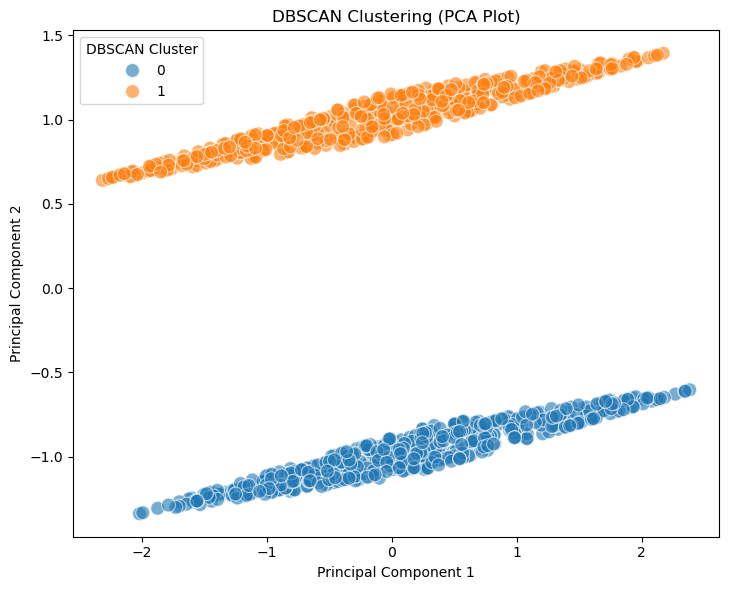

<Axes: xlabel='DBSCAN_Cluster', ylabel='count'>

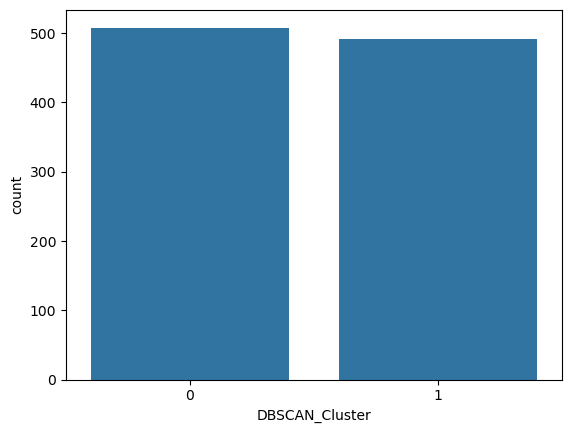

In [ ]:
#Kmeans Clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import seaborn as sb
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

l_e_t_t = LabelEncoder()

df["Transaction_Type_Encoded"] = l_e_t_t.fit_transform(df["Transaction_Type"])

feature = df[["Transaction_Amount", "Transaction_Frequency", "Transaction_Type_Encoded"]]

scaler_dbscan = StandardScaler()
f_s = scaler_dbscan.fit_transform(feature)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(f_s)
df['DBSCAN_Cluster'] = dbscan_clusters

if len(set(dbscan_clusters))>1:
    silhouette_avg_dbscan = silhouette_score(f_s, dbscan_clusters)
    print(f'Silhouette Score for dbscan: {silhouette_avg_dbscan}')
    dbi_dbscan = davies_bouldin_score(f_s, dbscan_clusters)
    print(f'Davies-Bouldin Index for dbscan: {dbi_dbscan}')
else:
    print("Only 1 Cluster found")


pca = PCA(n_components=2)
X_pca = pca.fit_transform(f_s)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='tab10', s=100, alpha=0.6)
plt.title('DBSCAN Clustering (PCA Plot)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='DBSCAN Cluster')
plt.tight_layout()
plt.show()

sb.countplot(x="DBSCAN_Cluster", data=df)

#### Product Recommendations

## K-Nearest Neighbor Algorithm

In [1]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357292 sha256=a58507744d7754a74bbca2b8ebefbccbcc8fe19c25ea88a5e10590b7f53bc4b6
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [10]:
#KNN BASIC
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)


model = KNNBasic(sim_options={'name': 'cosine', 'user_based': True})
model.fit(trainset)


def recommend_products(customer_id, model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'C09'
recommended_products = recommend_products(Customer_Id, model, df, product_mapping, n=5)
print(recommended_products)

predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
  Product_Id               Product_Name
0       P041            Gold Investment
1       P036     Real Estate Investment
2       P050               Tax Planning
3       P027  Wealth Management Service
4       P035             Trust Services


In [11]:
with open("knn_pro.pkl","wb") as f:
    pickle.dump(model,f)

In [12]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()

In [13]:
precision_at_k(predictions)

0.7044326241134752

In [14]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall

In [15]:
recall_at_k(predictions)

0.7044326241134752

In [16]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions

In [17]:
mean_average_precision(predictions)

0.03455422904022539

In [18]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']

        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))

        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()

In [19]:
ndcg_at_k(predictions)

0.9095145957393681

**Hyperparameter Tuning**

In [22]:
import pandas as pd
import pickle
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

param_grid={
    "k":[5,10,15],
    "sim_options":{"name":["cosine","msd","pearson"],
    "user_based":[True,False]}
}

gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)
gs.fit(data)

best_knn_model = gs.best_estimator["rmse"]
best_knn_model.fit(trainset)


def recommend_products(customer_id, best_knn_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [best_knn_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011'
recommended_products = recommend_products(Customer_Id, best_knn_model, df, product_mapping, n=5)
print(recommended_products)

predictions = best_knn_model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similar

In [23]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()
precision_at_k(predictions)

0.0

In [24]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall
recall_at_k(predictions)

0.0

In [25]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions
mean_average_precision(predictions)

0.0

In [26]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        user_df = user_df.nlargest(k, 'est')

        user_df['relevance'] = user_df['true_r']

        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))

        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()
ndcg_at_k(predictions)

0.0

**Single Value Decomposition**

In [27]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

product_mapping = {
    'P01': 'Basic Checking Account',
    'P02': 'Premium Checking Account',
    'P03': 'High-Yield Savings Account',
    'P04': 'Money Market Account',
    'P05': 'Standard Credit Card',
    'P06': 'Gold Credit Card',
    'P07': 'Platinum Credit Card',
    'P08': 'Business Credit Card',
    'P09': 'Personal Loan',
    'P010': 'Home Loan',
    'P011': 'Car Loan',
    'P012': 'Education Loan',
    'P013': 'Mortgage',
    'P014': 'Personal Loan',
    'P015': 'Fixed Deposit',
    'P016': 'Recurring Deposit',
    'P017': 'Investment Fund',
    'P018': 'Car Loan',
    'P019': 'Home Equity Loan',
    'P020': 'Gold Loan',
    'P021': 'Travel Insurance',
    'P022': 'Health Insurance',
    'P023': 'Life Insurance',
    'P024': 'Pet Insurance',
    'P025': 'Business Loan',
    'P026': 'Overdraft Protection',
    'P027': 'Wealth Management Service',
    'P028': 'Retirement Account',
    'P029': 'Savings Account',
    'P030': 'Gold Loan',
    'P031': 'Student Loan',
    'P032': 'Credit Line',
    'P033': 'Investment Advisory',
    'P034': 'Fixed Deposit',
    'P035': 'Trust Services',
    'P036': 'Real Estate Investment',
    'P037': 'Online Savings Account',
    'P038': 'Premium Savings Account',
    'P039': 'Cash Management Account',
    'P040': 'Luxury Credit Card',
    'P041': 'Gold Investment',
    'P042': 'Mutual Fund',
    'P043': 'Bonds',
    'P044': 'Stocks',
    'P045': 'Foreign Exchange Services',
    'P046': 'Financial Planning',
    'P047': 'Estate Planning',
    'P048': 'Long-Term Care Insurance',
    'P049': 'Short-Term Investment',
    'P050': 'Tax Planning'
}


interaction_type_mapping={'Viewed': 1, 'Clicked': 2, 'Purchased': 3}

df["Product_Name"]=df["Product_Id"].map(product_mapping)
df["Interaction_Type"]=df["Interaction_Type"].map(interaction_type_mapping)

reader=Reader(rating_scale=(1,3))
data = Dataset.load_from_df(df[['Customer_Id', 'Product_Id', 'Interaction_Type']], reader)
trainset, testset = train_test_split(data, test_size=0.25)

svd_model = SVD()
svd_model.fit(trainset)


def recommend_products(customer_id, svd_model, interaction_data, product_mapping, n=5):
    all_products = set(interaction_data['Product_Id'].unique())
    interacted_products = set(interaction_data[interaction_data['Customer_Id'] == customer_id]['Product_Id'])
    products_to_predict = list(all_products - interacted_products)
    predictions = [svd_model.predict(customer_id, product_id) for product_id in products_to_predict]
    top_n_predictions = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]
    recommended_product_ids = [pred.iid for pred in top_n_predictions]
    recommended_products = pd.DataFrame({
        'Product_Id': recommended_product_ids,
        'Product_Name': [product_mapping.get(pid, 'Unknown') for pid in recommended_product_ids]
    })
    return recommended_products

Customer_Id = 'cust011'
recommended_products = recommend_products(Customer_Id, svd_model, df, product_mapping, n=5)
print(recommended_products)

predictions = svd_model.test(testset)

  Product_Id              Product_Name
0       P048  Long-Term Care Insurance
1       P018                  Car Loan
2        P05      Standard Credit Card
3       P039   Cash Management Account
4        P02  Premium Checking Account


In [28]:
def precision_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    relevant_items = top_k.groupby('uid')['is_relevant'].mean()
    return relevant_items.mean()

In [29]:
precision_at_k(predictions)

0.0

In [30]:
def recall_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    recall = top_k.groupby('uid').apply(lambda x: x['is_relevant'].sum() / x['true_r'].count() if x['true_r'].count() > 0 else 0).mean()
    return recall

In [31]:
recall_at_k(predictions)

0.0

In [32]:
def mean_average_precision(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])
    pred_df = pred_df.reset_index(drop=True)
    top_k = pred_df.groupby('uid').apply(lambda x: x.nlargest(k, 'est')).reset_index(drop=True)
    top_k['is_relevant'] = top_k['true_r'] >= 2
    avg_precisions = top_k.groupby('uid').apply(lambda x: (x['is_relevant'].cumsum() / (x.index + 1)).mean()).mean()
    return avg_precisions

In [33]:
mean_average_precision(predictions)

0.0

In [34]:
import pandas as pd
import numpy as np

def ndcg_at_k(predictions, k=5):
    pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'true_r', 'est', 'details'])

    def ndcg(user_df):
        # Sort by estimated rating and get the top-k recommendations
        user_df = user_df.nlargest(k, 'est')

        # Calculate relevance for the top-k recommendations
        user_df['relevance'] = user_df['true_r']

        # Calculate ideal DCG
        ideal_relevance = user_df.sort_values('relevance', ascending=False)['relevance']
        ideal_dcg = np.sum((2 ** ideal_relevance - 1) / np.log2(np.arange(2, len(ideal_relevance) + 2)))

        # Calculate actual DCG
        actual_relevance = user_df['relevance']
        actual_dcg = np.sum((2 ** actual_relevance - 1) / np.log2(np.arange(2, len(actual_relevance) + 2)))

        # Return NDCG for the user
        return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0

    # Compute NDCG for each user and return the average
    ndcg_scores = pred_df.groupby('uid').apply(ndcg)
    return ndcg_scores.mean()

In [35]:
ndcg_at_k(predictions)

0.0